## 1
    Сгенерируйте самостоятельно начальные данные для линейной регрессии. Произведите разделение данных на обучающую и тестовую выборку. Обучите модель линейной регрессии на тренировочной выборке и
    предскажите значения на тестовой. Вычислите метрики MSE и MAE на тренировочной и тестовой выборках. Сделайте выводы. Верно ли, что ошибка на обучающей выборке всегда меньше, чем на тестовой?

(100, 1)


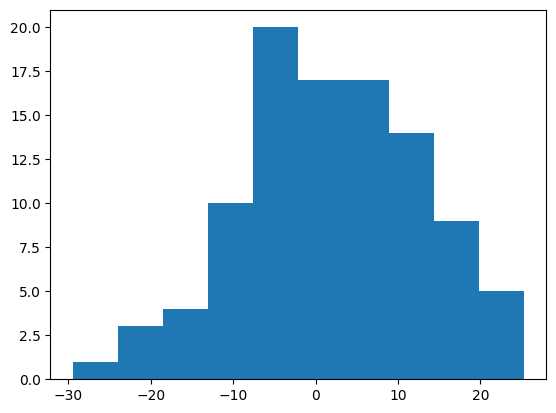

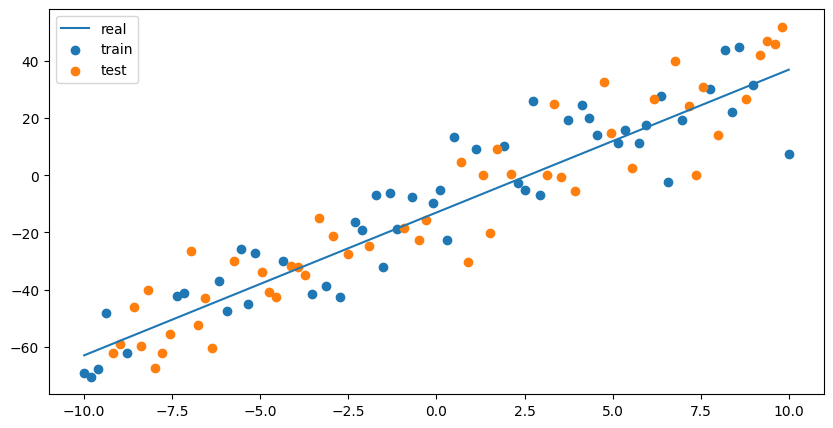

5.0021806263150115 -10.587875607000507


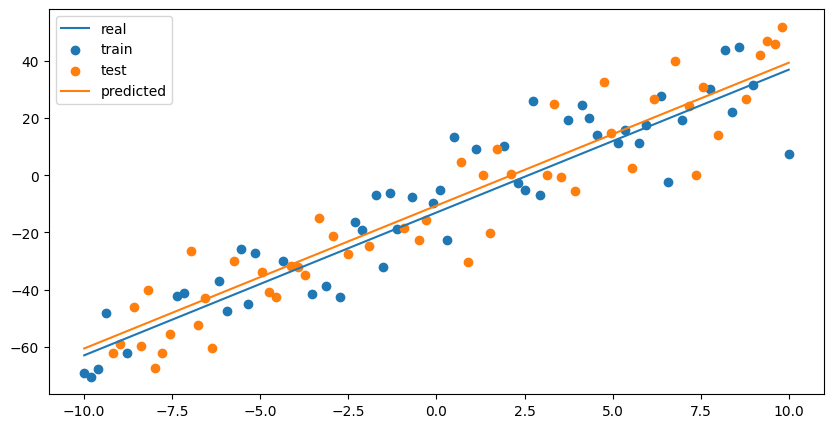

train Mse:  128.08902042706907
test Mse:  125.11263434664117
train MAE:  9.33555252947547
test MAE:  9.207049034540677


In [1]:
import numpy as np
import matplotlib.pyplot as plt

noise = np.random.randn(100) * 10
plt.hist(noise)

x = np.linspace(-10, 10, 100)
y = 5 * x - 13 + noise
x = x.reshape(-1, 1)
print(x.shape)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
plt.figure(figsize=(10, 5))
plt.plot(x, 5 * x - 13, label='real')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
plt.legend()
plt.show()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

w = model.coef_[0]
b = model.predict(np.zeros((1, 1)))[0]

print(w, b)

plt.figure(figsize=(10,5))
plt.plot(x, 5 * x - 13, label='real')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
plt.plot(x , x * w + b, label='predicted')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

print('train Mse: ', mean_squared_error(y_train, y_train_predicted))
print('test Mse: ', mean_squared_error(y_test, y_test_predicted))

print('train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Обычно ошибка на обучающей выборке меньше, но из-за большого количества шума или из-за удачной случайной выборки тестовых данных

## 2
    Приведите примеры постановки прикладных задач регрессионного анализа.
    В ответе привести примеры постановок трех задач, где применимы алгоритмы регрессии.

    1. Прогнозирование цен недвижимости
    (На основе характеристик объекта недвижимости (площадь, количество комнат, этаж, местоположение и т.д.) необходимо предсказать его рыночную стоимость.)
    2. прогнозирование роста криптовалюты
    (На основе данных о ценах криптовалюты за последние 30 дней предсказать её цену на следующий день.)
    3. Прогнозирование потребления электроэнергии
    ( На основе исторических данных о потреблении электроэнергии (время суток, день недели, погодные условия и т.д.) необходимо предсказать нагрузку на энергосети.)

## 3
    Приведите постановку прикладной задачи регрессионного анализа.
    Создайте или скачайте (готовый датасет из открытых источников) массив данных. Обучите модель линейной регрессии на тренировочной выборке и предскажите значения на тестовой. Вычислите метрики MSE и MAE на тренировочной и тестовой выборках. Сделайте выводы. Если Вы смогли сформулировать постановку своей задачи и решить ее, то мы ждем Вас на кафедральных конференциях.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


data = fetch_openml(name="autoMpg", version=1, as_frame=True)
df = data.frame


# Убедимся в отсутствии пропусков
df = df.dropna()

# Преобразование категориальных данных
X = df.drop(columns=["class"])  # Признаки
X = pd.get_dummies(X, drop_first=True)  # Кодируем категориальные переменные
y = df["class"]  # Целевая переменная


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_[0]
b = model.predict(np.zeros((1, 22)))[0]

linreg = LinearRegression(fit_intercept = True) 
linreg.fit(np.array(X_train).reshape(-1, 22), y_train)
a = linreg.coef_
c = linreg.intercept_
print(a, c)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)


# print("MSE на тренировочной выборке:", mse_train)
# print("MAE на тренировочной выборке:", mae_train)
# print("MSE на тестовой выборке:", mse_test)
# print("MAE на тестовой выборке:", mae_test)


In [21]:
print(a, c)


[-0.34578883  0.01510871 -0.02130175 -0.00614163  0.03795001  0.76774258
  1.61345707] -18.49936112872476


In [23]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model,origin,class
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0
